# Import Packages

In [15]:
# Packages
import pandas as pd
import numpy as np
import seaborn as sns

# Pipelines
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

# Preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer

# Model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pickle

# Import Data

In [16]:
# Import CSV
data = pd.read_csv('../data/data.csv')

# Drop uncecceary cols and those in the 'fight' dataset. Columns in 'fight' dataset contain
# information obtained during the fight which is no use in prediction pre-fight.
cols_to_drop = ['R_fighter', 'B_fighter', 'R_KD', 'B_KD', 'R_SIG_STR._pct', 
                'B_SIG_STR._pct', 'R_TOTAL_STR._pct', 'B_TOTAL_STR._pct','R_TD_pct', 
                'B_TD_pct','R_SUB_ATT', 'B_SUB_ATT','R_REV', 'B_REV', 'R_CTRL', 'B_CTRL', 
                'R_HEAD_pct','B_HEAD_pct', 'R_BODY_pct','B_BODY_pct', 'R_LEG_pct', 
                'B_LEG_pct','R_DISTANCE_pct','B_DISTANCE_pct', 'R_CLINCH_pct',
                'B_CLINCH_pct', 'R_GROUND_pct','B_GROUND_pct','last_round',
                'last_round_time','Format','Fight_type','win_by']

data.drop(columns=cols_to_drop, inplace=True)

# Imputing, Scaling, and Encoding

In [17]:
# Create Imputing and Scaling Pipelines
num_transformer = make_pipeline(SimpleImputer(strategy="median", missing_values = np.nan),
                                RobustScaler())
cat_transformer = make_pipeline(SimpleImputer(strategy="most_frequent", missing_values = np.nan),
                               OneHotEncoder(drop='if_binary', sparse_output=False))

# Select num_col and cat_col
num_col = make_column_selector(dtype_include=['number'])
cat_col = make_column_selector(dtype_include=['object','bool'])

# Transform the Columns
transformer = make_column_transformer(
    (num_transformer, num_col),
    (cat_transformer, cat_col),
    remainder='passthrough'
)

# Preprocessor Pipeline

In [18]:
preprocessor = make_pipeline(transformer)

preprocessor

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x126bda950>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x126bda1a0>)]))])

# Model

## Train test split

In [19]:
# Create X and y variables
X = data.drop(columns=['R_Win'])
y = data['R_Win']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [20]:
# Preprocess
X_train_pre = pd.DataFrame(preprocessor.fit_transform(X_train))
X_test_pre = pd.DataFrame(preprocessor.transform(X_test))

# Rename columns
X_train_pre.columns = preprocessor.get_feature_names_out()
X_test_pre.columns = preprocessor.get_feature_names_out()

## View train test dataframe

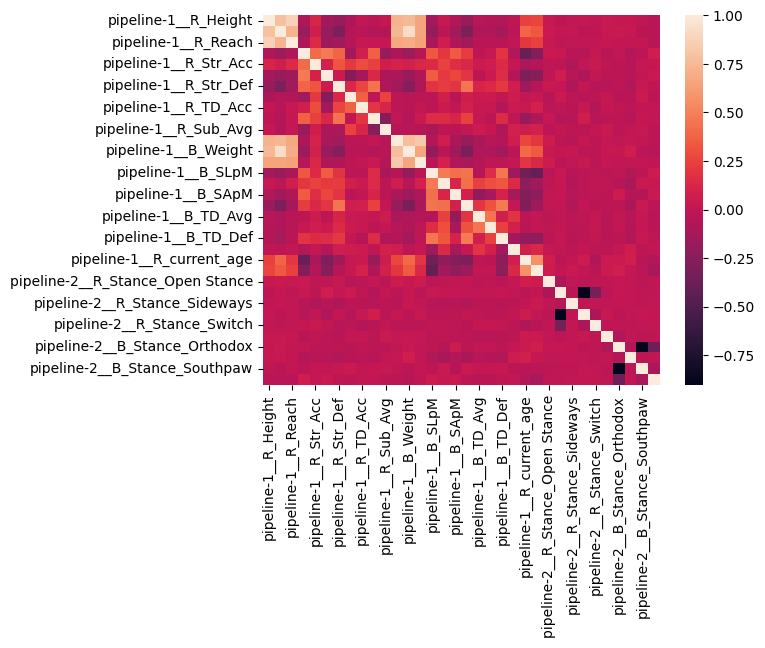

In [21]:
sns.heatmap(X_train_pre.corr());

## Model Pipeline

In [22]:
pipeline = make_pipeline(preprocessor,
                        LogisticRegression(max_iter=1000))
pipeline

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('pipeline-1',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('robustscaler',
                                                                                    RobustScaler())]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x126bda950>),
                                                                  ('pipeline-2',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('onehotencoder',
                                                                                    OneHotEncoder(drop='if_binary',
                                                                                                  sparse_output=False))]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x126bda1a0>)]))])),
                ('logisticregression', LogisticRegression(max_iter=1000))])

## Train and Score Model

In [23]:
# Fit Model
pipeline.fit(X_train_pre, y_train)

# Score Model
pipeline.score(X_test_pre, y_test)

0.7268145161290323

## Export Pipeline

In [24]:
#Export the fitted pipeline as a pickle file
with open('../models/max_model_v2_acc072.pkl', 'wb') as file:
    pickle.dump(pipeline, file)
print("Base_line_pipe is successfully saved as 'max_model_v2_acc072.pkl'")

Base_line_pipe is successfully saved as 'max_model_v2_acc072.pkl'
